In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection,metrics, svm      #grid_search,
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [4]:
#read training data
df = pd.read_csv('train.csv')
df = df.sample(frac=0.001)           #random select 0.1% of rows
print(df)

                                                 msno  \
4082810  rTRnQS/r4ShT0b4O+MibIwdjsMkoNKVDz9ZXxS0yCYg=   
7208849  TeQUhU/bEOd9E8tF3oQw0hvhsrexQveqY4JpjVXCHX8=   
1558194  gEcYF5Mb3FMPyaJeUx98WHgQOeUqOVBNdosPH8XRycg=   
874815   MfnqFh90tpVWsyp1YVFe03rZg8LjDIDZqKjcnmbKW/Y=   
6569363  kV/O8OSpIQmicSvCuxCqFLrmt94nN9HTyAVpyxc1Nh0=   
...                                               ...   
6892075  0gR6Hl63ExurTrvY9uEfmgDDgRj0nBaIse0DU199YT8=   
168375   Vh/2q2Y+ESQfcS4bXIdraSzryn/e1EHmpjUbvx+Bt00=   
2457545  iduk/8d4HbpKuYf+4SzifkoHpzmeDcW9yCnaZEkxdh8=   
3296373  aw0F3odb6ETJ5LtklT7Ag2b9HiCdidrRVkN7bbJLx3I=   
1692071  S7CMolTRHVHHR+/zXLtRsuk3Ko5RSYM2rbl6Yj+WjXg=   

                                              song_id source_system_tab  \
4082810  qcT1nkRj//s3CGLHn2fV8LoB97q9ctGGvl93auq7Guk=        my library   
7208849  ls2DaFwqfKpflreqd5rUgWlHA+A22a5DT+NRRmUDD8I=            search   
1558194  nBh/12CeQ3B0/CKJw/TrYHJYERGXrfixEOyd3PWBD+k=        my library   
874815   u9z+kv

In [5]:
#using songs and members dataset
songs = pd.read_csv('songs.csv')
print(songs)
df = pd.merge(df, songs, on='song_id', how='left') #merge the dataframe by songs_id
del songs                    #delete the variables song

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

In [6]:
# Load and join songs data
members = pd.read_csv('members.csv')
print(members)
df = pd.merge(df, members, on='msno', how='left')   #merge the dataframe by msno
del members

                                               msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                20110820         20170920  
1    

In [7]:
#the percentage of null values
df.isnull().sum()/df.isnull().count()

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003253
source_screen_name        0.055443
source_type               0.002711
target                    0.000000
song_length               0.000000
genre_ids                 0.015725
artist_name               0.000000
composer                  0.227464
lyricist                  0.431341
language                  0.000000
city                      0.000000
bd                        0.000000
gender                    0.392843
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
dtype: float64

In [8]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [9]:
# seperate the column of registration_init_date with month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


# seperate the column of expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [10]:
# convert into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [11]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    #df[col] = df[col].astype('category')

msno
song_id
source_system_tab
source_screen_name
source_type
genre_ids
artist_name
composer
lyricist
gender


In [12]:
df.select_dtypes(include=['object'])

,msno,song_id,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,gender
0,rTRnQS/r4ShT0b4O+MibIwdjsMkoNKVDz9ZXxS0yCYg=,qcT1nkRj//s3CGLHn2fV8LoB97q9ctGGvl93auq7Guk=,my library,Local playlist more,local-playlist,465,張韶涵 (Angela Chang),動靜音樂,王雅君,unknown
1,TeQUhU/bEOd9E8tF3oQw0hvhsrexQveqY4JpjVXCHX8=,ls2DaFwqfKpflreqd5rUgWlHA+A22a5DT+NRRmUDD8I=,search,Album more,album,1259,熱狗 (MC HotDog),姚中仁/張震嶽,姚中仁/張震嶽,unknown
2,gEcYF5Mb3FMPyaJeUx98WHgQOeUqOVBNdosPH8XRycg=,nBh/12CeQ3B0/CKJw/TrYHJYERGXrfixEOyd3PWBD+k=,my library,Local playlist more,local-playlist,465,林俊傑 (JJ Lin),林俊傑,姚若龍,male
3,MfnqFh90tpVWsyp1YVFe03rZg8LjDIDZqKjcnmbKW/Y=,u9z+kvlYCkrSlDdJv3O/t5h+JpZJrSn2ZBI1GWe+EYQ=,my library,Local playlist more,local-library,465,Miley Cyrus,Lukasz Gottwald| Claude Kelly| Jessica Cornish,unknown,unknown
4,kV/O8OSpIQmicSvCuxCqFLrmt94nN9HTyAVpyxc1Nh0=,k8s6aRatZAv/w4exkA4Oa8r75gBrxG0z3CHdb9Lrexc=,search,Search,song,465,Eric 周興哲,Eric 周興哲,吳易緯,male
...,...,...,...,...,...,...,...,...,...,...
7372,0gR6Hl63ExurTrvY9uEfmgDDgRj0nBaIse0DU199YT8=,GSzkHSWmWo4vZmF5s7+w6Y5EvTv5bpOnbZsFprUc/Yg=,radio,Radio,radio,921,Que Sera Sera,unknown,unknown,female
7373,Vh/2q2Y+ESQfcS4bXIdraSzryn/e1EHmpjUbvx+Bt00=,FDVy0pjMHkCjuxphs2p149PfqFF92e/wlvg9MKy/rk0=,my library,Local playlist more,local-library,2022,Tizzy Bac,unknown,unknown,unknown
7374,iduk/8d4HbpKuYf+4SzifkoHpzmeDcW9yCnaZEkxdh8=,7pVp4DvikAFHXWFmws+GYnsrKzWI/EUccAy1apWJTXM=,radio,Radio,radio,465,劉彥羣,劉彥羣,劉彥羣,unknown
7375,aw0F3odb6ETJ5LtklT7Ag2b9HiCdidrRVkN7bbJLx3I=,OAIBxekYEb8alz8SDpozofgTf5qL3nozyuHJPvjr9QU=,my library,Local playlist more,local-library,458,林志炫 (Terry Lin),Yao-Chuan Chen,Jia-Yang Yi,unknown


In [13]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [14]:
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)

# Data dimension reduction

In [15]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Training via SVM

In [16]:
# Model with the best estimator
model = svm.SVC()
model.fit(df[df.columns[df.columns != 'target']], df.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

model = svm.SVC()
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

In [18]:
X_array=df['target'].values

In [19]:
model.score(df[df.columns[df.columns != 'target']], df.target)

0.8236410464958656

# Data preprocessing for Testing set

In [20]:
df_test=pd.read_csv('test.csv')

songs = pd.read_csv('songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

In [21]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [22]:
predictions=np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [23]:
predictions = predictions/3

submission = pd.read_csv('sample_submission.csv')

submission.target=predictions
submission.to_csv('svm.csv',index=False)

In [24]:
length=df['target'].count()
split=0.3
test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

# Results

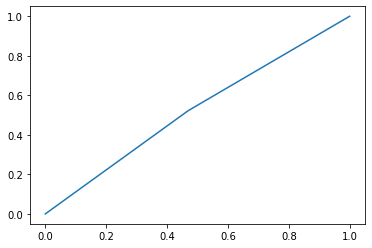

In [26]:
from random import randint
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)
x=[randint(0,1) for p in range(0,2214)]
fpr, tpr, thresholds = roc_curve(test['target'], x)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)
plt.show()

In [27]:
roc_auc

0.526396878828726

In [28]:
X_array=test['target'].values

In [29]:
from sklearn.metrics import classification_report
target_names=['class 0','class1']
print(classification_report(X_array,predictions_roc,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.47      1.00      0.64      1047
      class1       0.00      0.00      0.00      1167

    accuracy                           0.47      2214
   macro avg       0.24      0.50      0.32      2214
weighted avg       0.22      0.47      0.30      2214

